<a href="https://colab.research.google.com/github/Mostofa-Najmus-Sakib/Data-Science-CS533/blob/main/Assisgnment1/Assisgnment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: College Scorecard

Loading Necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline
from scipy import stats

# 2. Description of the data set’s basic characteristics

Loading the dataset

In [ ]:
data =  pd.read_csv('MERGED2017_18_PP.csv')
data.head()

C:\Users\Sajon_PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (31,1726,1727,1728,1729,1815,1817,1823,1830,1884,1885,1886,1887,1888,1894,1895,1896,1897,1898,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.4048,0.2645,0.0137,0.315,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.5448,0.12,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.028,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5121,0.1593,0.0165,0.323,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4226,0.0754,0.0254,0.5327,0.3133,0.1286,0.021,0.5804,0.1678,0.2308


## 2. a. How many schools are there?

OPEID is the identification number used by the U.S. Department of
Education's Office of Postsecondary Education (OPE) and Federal
Student Aid Office (FSA) to identify institutions that have Program
Participation Agreements (PPA) so that its students are eligible to
participate in Federal Student Financial Assistance programs under Title
IV regulations. So I have used OPEID to count the number of schools

Ideally there should one OPEID for each indivual school but there are 31 schools which have the same OPEID number because for the online program it also has the same OPEID number, so I have counted the number considering them as a unit and also  individually using nunique and count fucntion 

In [ ]:
a1_2a_1 = data['OPEID'].count()
print("The number of school's considering total amount are:",a1_2a_1)
a1_2a_2 = data['OPEID'].nunique()
print("The number of school's considering online programs and main program together are:",a1_2a_2)

The number of school's considering total amount are: 7115
The number of school's considering online programs and main program together are: 7084


## 2. b. How many main and branch schools are there? (the variable MAIN is 1 for a main campus, and 0 for a branch) 

The category to describe the MAIN and Branch campus is received from the MAIN column in the dataset, The main campus column (MAIN) identifies whether the institution’s
IPEDS-derived data elements represent the main campus of the institution or not, where 1 is a main campus and 0 is not

In [ ]:
a1_2b = data['MAIN'].value_counts()
print("The number of Main campus school's are:",a1_2b[1])
print("The number of branch campus school's are:",a1_2b[0])

The number of Main campus school's are: 5489
The number of branch campus school's are: 1626


## 2.c. How many schools are there per state?

The number of school is already available from the OPEID variable, this time I grouped in by state to have the school per state

In [ ]:
a1_2c = data.groupby('STABBR')['OPEID'].count()
print("The number of school's per state are:")
a1_2c.head()

The number of school's per state are:


STABBR
AK      9
AL     94
AR     89
AS      1
AZ    125
Name: OPEID, dtype: int64

## 2.d. How are schools-per-state distributed? Describe this both numerically and with a plot. 

Using the same result from previous question I have calculated the statistics below first

In [ ]:
a1_2d = a1_2c.to_frame()
a1_2d.rename(columns={'OPEID':'Number of School'}, inplace=True)
a1_2d.describe()

,Number of School
count,59.000000
mean,120.593220
std,135.336123
min,1.000000
25%,29.500000
50%,88.000000
75%,158.500000
max,716.000000


Plot of distribution of school per state

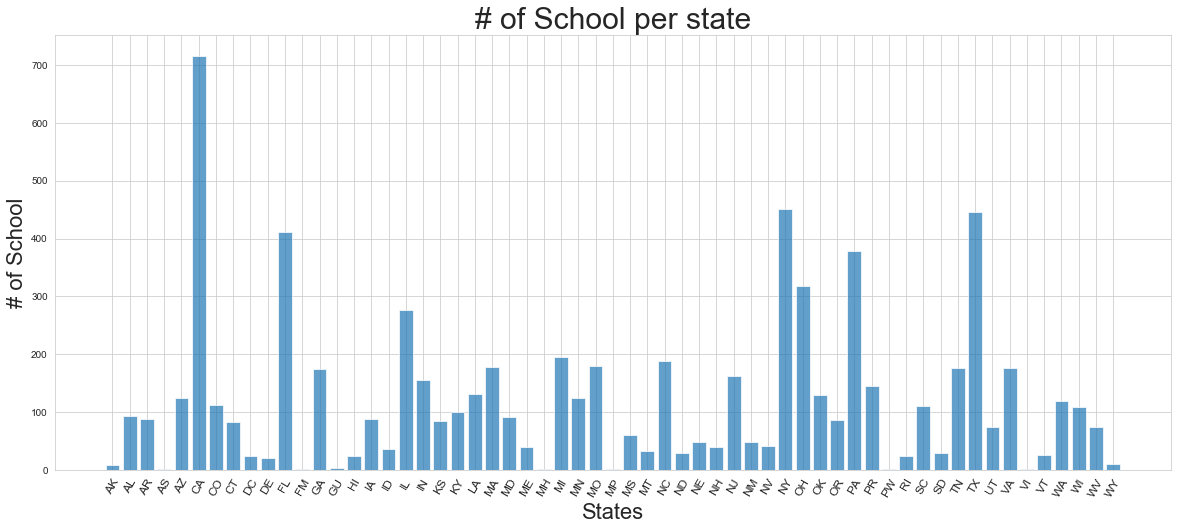

In [ ]:
ff = list(a1_2c.index) # names for ylabel
dd = a1_2d['Number of School']
y_pos = np.arange(len(ff)) #position of y label
plt.figure(figsize=(20,8)) #fixing the figure size
plt.bar(y_pos, dd, align='center', alpha=0.7) # creating the plot
plt.xticks(y_pos, ff, fontsize=12) # changing the fontsize of xticks
plt.xticks(rotation=60) #changing the orientaion of xticks
plt.xlabel('States', fontsize=22) # xlabel
plt.ylabel('# of School', fontsize=22) # ylabel
plt.title('# of School per state', fontsize=30) #title
#plt.grid() #turning on the grid
plt.show() #displaying the plot

# Examine numeric statistics - what are their averages? How are they distributed?

## 3.School enrollment (size)

To calculate the school enrollment we need to take the UGDS variable. This element (UGDS) includes the number of degree/certificate-seeking
undergraduates enrolled in the fall, as reported in the IPEDS Fall
Enrollment component. 

In [ ]:
a1_3a = data['UGDS']
a1_3a = pd.DataFrame(a1_3a)
a1_3a.head()
a1_3a.describe()

,UGDS
count,6367.000000
mean,2426.058426
std,5481.326798
min,0.000000
25%,106.000000
50%,401.000000
75%,2018.000000
max,77269.000000


The distribution for the school enrollment 

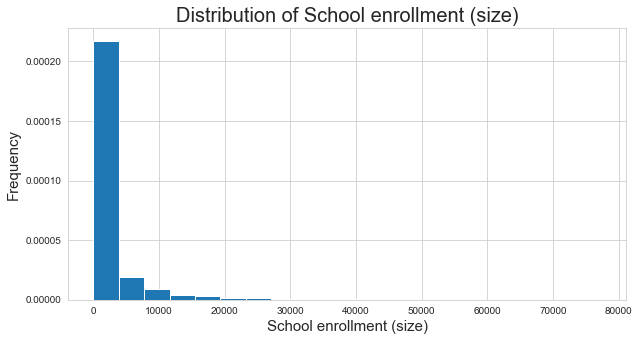

In [ ]:
a1_3a = data['UGDS']
plt.figure(figsize=(10,5))
plt.hist(a1_3a,density=True, bins=20)
plt.xlabel('School enrollment (size)', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of School enrollment (size)', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

## 3.b. Completion rate

For completion rate there is actually couple of dataset. Currently, institutions report (via the IPEDS Graduation Rates
component) on the completion rates for full-time, first-time students
who complete within 100 or 150 percent of the expected time to
completion (C[100 or 150 or 200]_4 for four-year institutions and C[100 or
150 or 200]_L4 for less-than-four-year institutions). 

I have used the describe function on all the horizons (100,150,200) for both C100_4 and C100_L4 to check the data characteristics.

Horizon - 4 years (100%) for4 years (C100_4_POOLED)

In [ ]:
a1_3b_1 = data['C100_4_POOLED']
a1_3b_1_df = pd.DataFrame(a1_3b_1)
a1_3b_1_df.head()
a1_3b_1_df.describe()

,C100_4_POOLED
count,2176.000000
mean,0.338919
std,0.229770
min,0.000000
25%,0.159425
50%,0.305500
75%,0.497325
max,1.000000


Horizon - 4 years (100%) for less than 4 years (C100_L4_POOLED)

In [ ]:
a1_3b_2 = data['C100_L4_POOLED']
a1_3b_2_df = pd.DataFrame(a1_3b_2)
a1_3b_2_df.head()
a1_3b_2_df.describe()

,C100_L4_POOLED
count,3577.000000
mean,0.365899
std,0.275668
min,0.000000
25%,0.124700
50%,0.309100
75%,0.585800
max,1.000000


For districution I used the "combined first" function to select the variable appropriate for each school between horizon 4 years in between both the 4 years and less than 4 years. This gave me a single column from those 2 and I plot the later one to see the districution

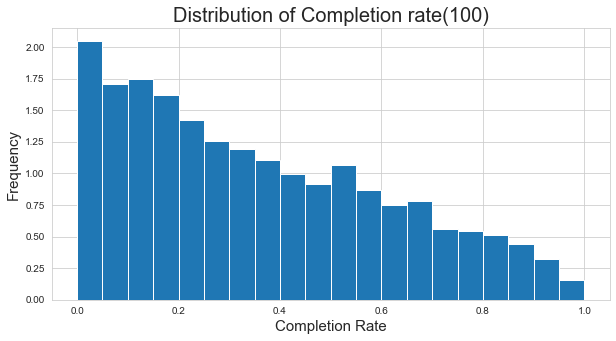

In [ ]:
a1_3b_1_series = pd.Series(a1_3b_1)
a1_3b_2_series = pd.Series(a1_3b_2)
a1_3b_100 = a1_3b_1_series.combine_first(a1_3b_2_series)
plt.figure(figsize=(10,5))
plt.hist(a1_3b_100,density=True, bins=20)
plt.xlabel('Completion Rate', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Completion rate(100)', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

Horizon - 6 years (150%) for 6 years (C150_4_POOLED)

In [ ]:
a1_3b_3 = data['C150_4_POOLED']
a1_3b_3_df = pd.DataFrame(a1_3b_3)
a1_3b_3_df.head()
a1_3b_3_df.describe()

,C150_4_POOLED
count,2400.000000
mean,0.483870
std,0.212845
min,0.000000
25%,0.323625
50%,0.481650
75%,0.635275
max,1.000000


Horizon - 6 years (150%) for less than 6 years (C150_L4_POOLED)

In [ ]:
a1_3b_4 = data['C150_L4_POOLED']
a1_3b_4_df = pd.DataFrame(a1_3b_4)
a1_3b_4_df.head()
a1_3b_4_df.describe()

,C150_L4_POOLED
count,3578.000000
mean,0.574248
std,0.236950
min,0.000000
25%,0.371425
50%,0.621600
75%,0.760550
max,1.000000


Like the previous here also I used the combined first function to create one variable and later plotted it

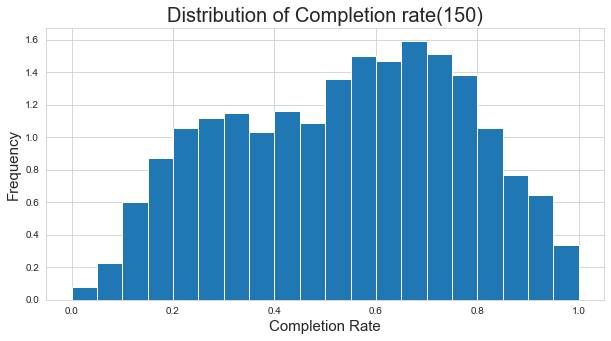

In [ ]:
a1_3b_3_series = pd.Series(a1_3b_3)
a1_3b_4_series = pd.Series(a1_3b_4)
a1_3b_150 = a1_3b_3_series.combine_first(a1_3b_4_series)
plt.figure(figsize=(10,5))
plt.hist(a1_3b_150,density=True, bins=20)
plt.xlabel('Completion Rate', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Completion rate(150)', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is almost a normal distribution with little abundance on the right poetion. So I think we can use both meadian and mean but still median would be the more accurate measure

Horizon - 8 years (200%) for 8 years (C200_4_POOLED)

In [ ]:
a1_3b_5 = data['C200_4_POOLED']
a1_3b_5_df = pd.DataFrame(a1_3b_5)
a1_3b_5_df.head()
a1_3b_5_df.describe()

,C200_4_POOLED
count,2097.000000
mean,0.495236
std,0.218721
min,0.000000
25%,0.348200
50%,0.499800
75%,0.651000
max,1.000000


Horizon - 8 years (200%) for less than 8 years (C200_L4_POOLED)

In [ ]:
a1_3b_6 = data['C200_L4_POOLED']
a1_3b_6_df = pd.DataFrame(a1_3b_6)
a1_3b_6_df.head()
a1_3b_6_df.describe()

,C200_L4_POOLED
count,3500.000000
mean,0.590888
std,0.228154
min,0.000000
25%,0.393350
50%,0.633200
75%,0.771125
max,1.000000


Like the previous here also I used the combined first function to create one variable and later plotted it

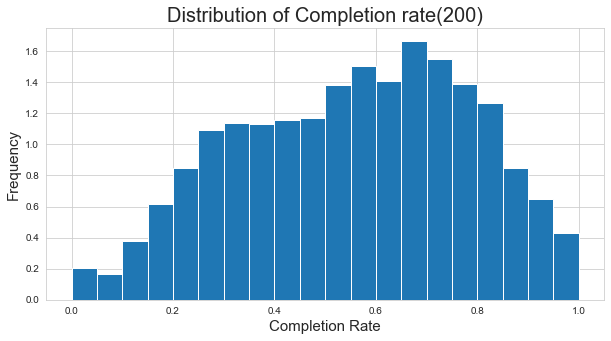

In [ ]:
a1_3b_5_series = pd.Series(a1_3b_5)
a1_3b_6_series = pd.Series(a1_3b_6)
a1_3b_200 = a1_3b_5_series.combine_first(a1_3b_6_series)
plt.figure(figsize=(10,5))
plt.hist(a1_3b_200,density=True, bins=20)
plt.xlabel('Completion Rate', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Completion rate(200)', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is almost a normal distribution with little abundance on the right poetion. So I think we can use both meadian and mean but still median would be the more accurate measure

## 3.c. Admission rate

For admission rate there are 2 variables.  For institutions with multiple branches,
ADM_RATE includes the admissions rate at each campus, while
ADM_RATE_ALL represents the admissions rate across all campuses,
defined as the total number of admitted undergraduates across all branches divided by the total number of undergraduates who applied
across all branches.

I have shown the plots and descriptive statistics for both of them

ADM_RATE 

In [ ]:
a1_3c_1 = data['ADM_RATE']
a1_3c_1 = pd.DataFrame(a1_3c_1)
a1_3c_1.head()
a1_3c_1.describe()

,ADM_RATE
count,2037.000000
mean,0.681822
std,0.212179
min,0.000000
25%,0.550000
50%,0.707600
75%,0.838400
max,1.000000


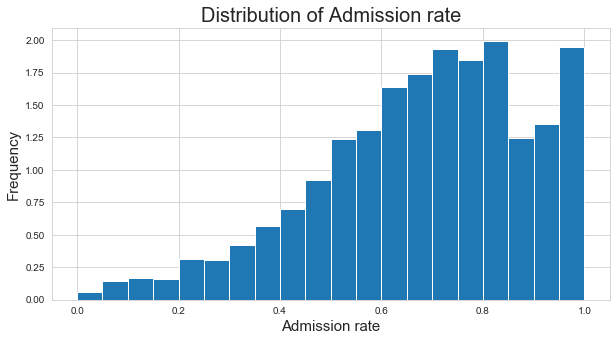

In [ ]:
a1_3c_1 = data['ADM_RATE']
plt.figure(figsize=(10,5))
plt.hist(a1_3c_1,density=True, bins=20)
plt.xlabel('Admission rate', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Admission rate', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the right side. So I think the median is the most appropiate measure

ADM_RATE_ALL

In [ ]:
a1_3c_2 = data['ADM_RATE_ALL']
a1_3c_2 = pd.DataFrame(a1_3c_2)
a1_3c_2.head()
a1_3c_2.describe()

,ADM_RATE_ALL
count,2250.000000
mean,0.685316
std,0.205749
min,0.000000
25%,0.560169
50%,0.710218
75%,0.835517
max,1.000000


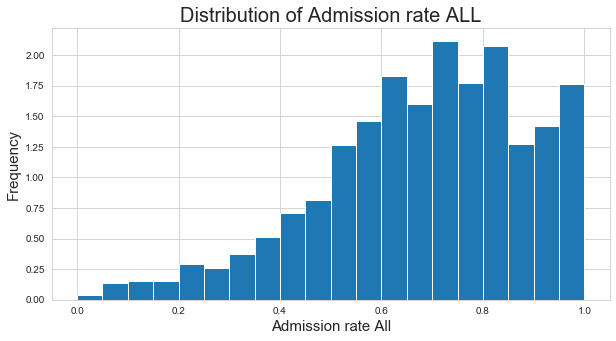

In [ ]:
a1_3c_2 = data['ADM_RATE_ALL']
plt.figure(figsize=(10,5))
plt.hist(a1_3c_2,density=True, bins=20)
plt.xlabel('Admission rate All', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Admission rate ALL', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

# 3.d. Tuition and Fees

the cost data include the tuition and required fees of the
institution. They are provided for in-state students (TUITIONFEE_IN),
out-of-state students (TUITIONFEE_OUT), and program-year institutions
(TUITIONFEE_PROG). I ahve shown statistics values and plot for all of them

InState Tuition & Fees

In [ ]:
a1_3d_1 = data['TUITIONFEE_IN']
a1_3d_1 = pd.DataFrame(a1_3d_1)
a1_3d_1.head()
a1_3d_1.describe()

,TUITIONFEE_IN
count,4028.000000
mean,15081.399950
std,12723.724262
min,0.000000
25%,5246.250000
50%,11296.000000
75%,19400.000000
max,74514.000000


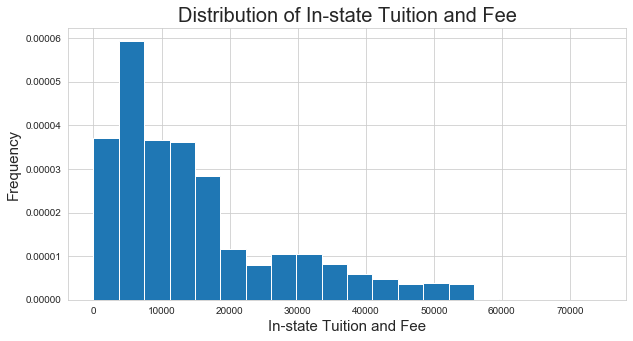

In [ ]:
a1_3d_1 = data['TUITIONFEE_IN']
plt.figure(figsize=(10,5))
plt.hist(a1_3d_1,density=True, bins=20)
plt.xlabel('In-state Tuition and Fee', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of In-state Tuition and Fee', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

Out of State Tuition & Fees

In [ ]:
a1_3d_2 = data['TUITIONFEE_OUT']
a1_3d_2 = pd.DataFrame(a1_3d_2)
a1_3d_2.head()
a1_3d_2.describe()

,TUITIONFEE_OUT
count,3800.00000
mean,18260.22500
std,12009.87206
min,0.00000
25%,8943.50000
50%,15000.00000
75%,24810.00000
max,74514.00000


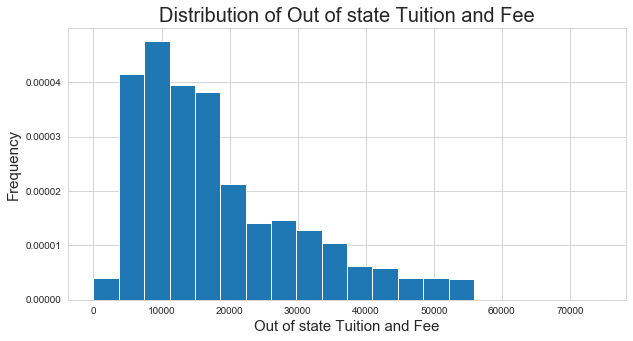

In [ ]:
a1_3d_2 = data['TUITIONFEE_OUT']
plt.figure(figsize=(10,5))
plt.hist(a1_3d_2,density=True, bins=20)
plt.xlabel('Out of state Tuition and Fee', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Out of state Tuition and Fee', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

program-year institutions Tuition and Fee

In [ ]:
a1_3d_3 = data['TUITIONFEE_PROG']
a1_3d_3 = pd.DataFrame(a1_3d_3 )
a1_3d_3 .head()
a1_3d_3 .describe()

,TUITIONFEE_PROG
count,2481.000000
mean,15475.343410
std,7916.308446
min,370.000000
25%,12005.000000
50%,15100.000000
75%,17250.000000
max,117450.000000


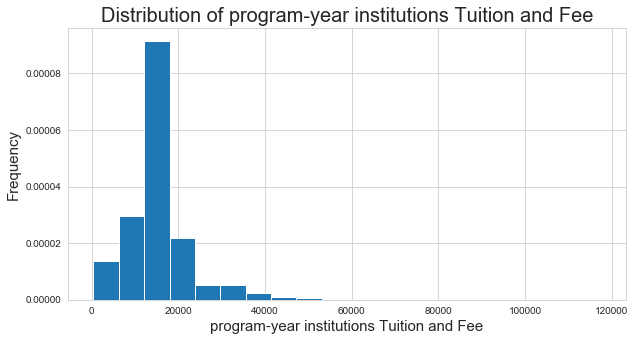

In [ ]:
a1_3d_3 = data['TUITIONFEE_PROG']
plt.figure(figsize=(10,5))
plt.hist(a1_3d_3,density=True, bins=20)
plt.xlabel('program-year institutions Tuition and Fee', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of program-year institutions Tuition and Fee', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

## 3.e. Cost (Average Cost of Attendance, COSTT4_A/COSTT4_P)

The average annual cost of attendance includes tuition and fees, books
and supplies, and living expenses for all full-time, first-time, degree-
/certificate-seeking undergraduates who receive Title IV aid. These data are available separately for academic year institutions (COSTT4_A) and
for program-year institutions (COSTT4_P). 

For average cost of attendance I have calculated staistics and plotted for both COSTT4_A/COSTT4_P

COSTT4_A - academic year institutions

In [ ]:
a1_3e_1 = data['COSTT4_A']
a1_3e_1 = pd.DataFrame(a1_3e_1)
a1_3e_1.head()
a1_3e_1.describe()

,COSTT4_A
count,3584.000000
mean,26337.065569
std,15015.591278
min,0.000000
25%,14000.250000
50%,22646.500000
75%,33941.750000
max,93704.000000


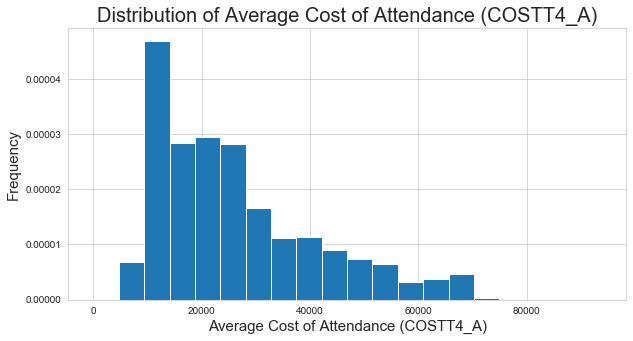

In [ ]:
a1_3e_1 = data['COSTT4_A']
plt.figure(figsize=(10,5))
plt.hist(a1_3e_1,density=True, bins=20)
plt.xlabel('Average Cost of Attendance (COSTT4_A)', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Average Cost of Attendance (COSTT4_A)', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

COSTT4_P - program-year institutions 

In [ ]:
a1_3e_2 = data['COSTT4_P']
a1_3e_2 = pd.DataFrame(a1_3e_2)
a1_3e_2.head()
a1_3e_2.describe()

,COSTT4_P
count,2294.000000
mean,19933.401482
std,6606.257368
min,3522.000000
25%,15517.750000
50%,19347.500000
75%,23958.500000
max,105745.000000


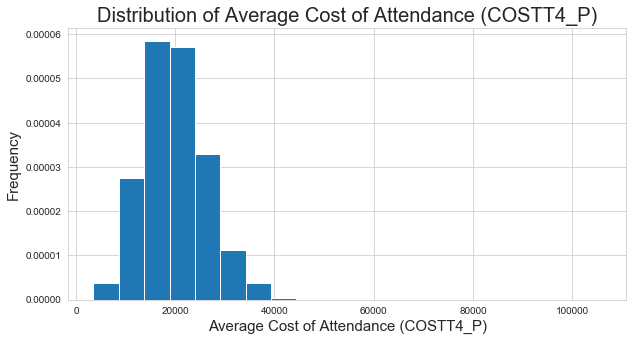

In [ ]:
a1_3e_2 = data['COSTT4_P']
plt.figure(figsize=(10,5))
plt.hist(a1_3e_2,density=True, bins=20)
plt.xlabel('Average Cost of Attendance (COSTT4_P)', fontsize=15) # xlabel
plt.ylabel('Frequency', fontsize=15) # ylabel
plt.title('Distribution of Average Cost of Attendance (COSTT4_P)', fontsize=20) #title
plt.show() #displaying the plot

The distribution above is highly skewed on the left side. So I think the median is the most appropiate measure

# 4 Break down of completion rate by school characteristics 

## 4.a.

For state wise dsitricution of completion rate I brought back my completion rate (meged one using the combine first function) for all three horizon 100/150/200 and showed a table of statistics value 

state vs completion rate (100%)

In [ ]:
a1_3b_100_pd = pd.DataFrame(a1_3b_100)
a1_4a_100_col  = a1_3b_100_pd.assign(STABBR = data['STABBR'])
a1_4a_100 = a1_4a_100_col .groupby('STABBR')['C100_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4a_100.head()

,25%,50%,75%,count,mean,std,min,max
STABBR,,,,,,,,
AK,0.087625,0.14305,0.490650,8.0,0.317050,0.331369,0.0408,0.9182
AL,0.070000,0.14220,0.198050,80.0,0.163011,0.129437,0.0000,0.6181
AR,0.133250,0.18745,0.332425,74.0,0.234576,0.161084,0.0037,0.7736
AS,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
AZ,0.100300,0.27395,0.515375,104.0,0.326769,0.260985,0.0000,1.0000


state vs completion rate (150%)

In [ ]:
a1_3b_150_pd = pd.DataFrame(a1_3b_150)
a1_4a_150_col  = a1_3b_150_pd.assign(STABBR = data['STABBR'])
a1_4a_150 = a1_4a_150_col .groupby('STABBR')['C150_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4a_150.head()

,25%,50%,75%,count,mean,std,min,max
STABBR,,,,,,,,
AK,0.233775,0.3145,0.55065,8.0,0.422775,0.265308,0.1837,0.9182
AL,0.222500,0.3567,0.49070,81.0,0.371412,0.187990,0.0000,0.8889
AR,0.275425,0.4191,0.62055,74.0,0.436364,0.199061,0.0848,0.8679
AS,0.319800,0.3198,0.31980,1.0,0.319800,NaN,0.3198,0.3198
AZ,0.255375,0.5512,0.70240,106.0,0.508448,0.250139,0.0467,1.0000


state vs completion rate (200%)

In [ ]:
a1_3b_200_pd = pd.DataFrame(a1_3b_200)
a1_4a_200_col  = a1_3b_200_pd.assign(STABBR = data['STABBR'])
a1_4a_200 = a1_4a_200_col .groupby('STABBR')['C200_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4a_200.head()

,25%,50%,75%,count,mean,std,min,max
STABBR,,,,,,,,
AK,0.28415,0.47610,0.64545,7.0,0.490286,0.249345,0.2162,0.8805
AL,0.24440,0.36840,0.47330,79.0,0.378444,0.179970,0.0000,0.7433
AR,0.31585,0.42670,0.65110,75.0,0.473692,0.214457,0.0484,1.0000
AS,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
AZ,0.27300,0.54935,0.71570,98.0,0.507256,0.244839,0.0000,0.8842


## 4.b. Control / ownership (public, nonprofit, for-profit)

This element (CONTROL) is reported directly to IPEDS, and identifies
whether the institution’s governance structure is public, private
nonprofit, or private for-profit.

For Control like previous one I used the completion rate for all 3 hrorizon (100/150/200) and plotted with respect to public, nonprofit, for-profit

Control / ownership (public, nonprofit, for-profit) - 100%

Text(0.5, 0, 'Ownership')

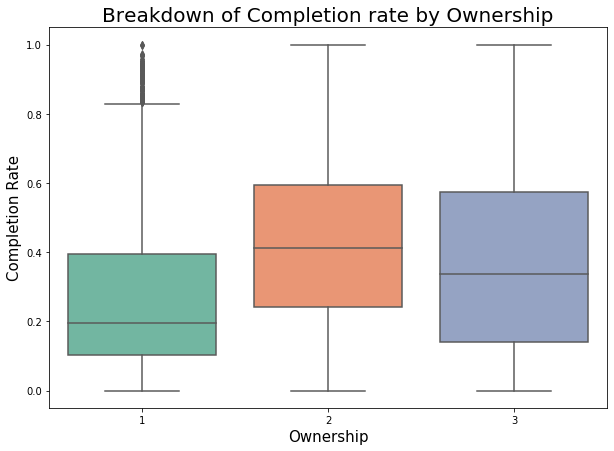

In [ ]:
a1_3b_100_pd = pd.DataFrame(a1_3b_100)
a1_4b_100_col  = a1_3b_100_pd.assign(CONTROL = data['CONTROL'])
plt.figure(figsize=(10,7))
ax100 = sns.boxplot(x="CONTROL", y="C100_4_POOLED", data=a1_4b_100_col,palette="Set2")
ax100.set_title('Breakdown of Completion rate by Ownership', fontsize=20)
ax100.set_ylabel('Completion Rate', fontsize=15)
ax100.set_xlabel('Ownership', fontsize=15)

here the ownership class 1 has the lowest completion rate while class 2 has the maxm amount of completion rate among the 3 class

Control / ownership (public, nonprofit, for-profit) - 150%

Text(0.5, 0, 'Ownership')

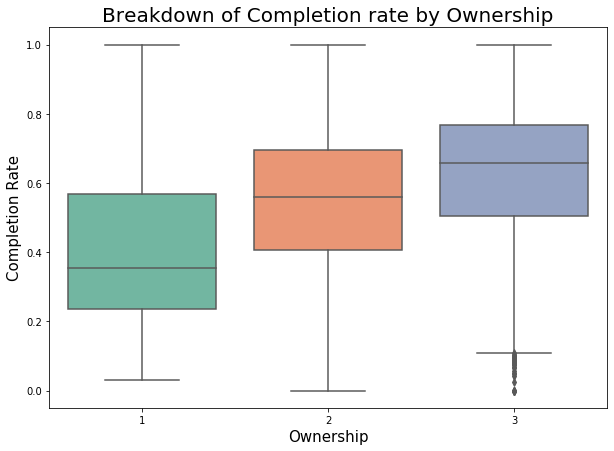

In [ ]:
a1_3b_150_pd = pd.DataFrame(a1_3b_150)
a1_4b_150_col  = a1_3b_150_pd.assign(CONTROL = data['CONTROL'])
plt.figure(figsize=(10,7))
ax150 = sns.boxplot(x="CONTROL", y="C150_4_POOLED", data=a1_4b_150_col,palette="Set2" )
ax150.set_title('Breakdown of Completion rate by Ownership', fontsize=20)
ax150.set_ylabel('Completion Rate', fontsize=15)
ax150.set_xlabel('Ownership', fontsize=15)

here the ownership class 1 has the lowest completion rate while class 3 has the maxm amount of completion rate among the 3 class

Control / ownership (public, nonprofit, for-profit) - 200%

Text(0.5, 0, 'Ownership')

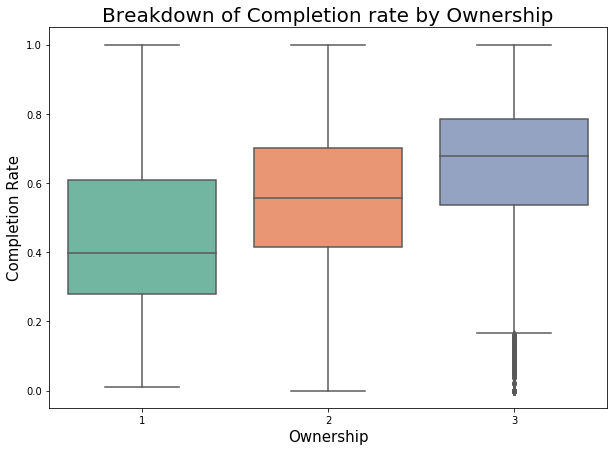

In [ ]:
a1_3b_200_pd = pd.DataFrame(a1_3b_200)
a1_4b_200_col  = a1_3b_200_pd.assign(CONTROL = data['CONTROL'])
plt.figure(figsize=(10,7))
ax200 = sns.boxplot(x="CONTROL", y="C200_4_POOLED", data=a1_4b_200_col,palette="Set2")
ax200.set_title('Breakdown of Completion rate by Ownership', fontsize=20)
ax200.set_ylabel('Completion Rate', fontsize=15)
ax200.set_xlabel('Ownership', fontsize=15)

here the ownership class 1 has the lowest completion rate while class 3 has the maxm amount of completion rate among the 3 class

## 4.c. Carnegie classification

The Carnegie Foundation classifies institutions in several ways. These
data include the basic classification (CCBASIC), the undergraduate
profile (CCUGPROF), and the size and setting classification (CCSIZSET).
These data are included only in the most recent Scorecard data file, and
represent the 2018 Carnegie Classifications.

For Carnegie classification like previous one I used the completion rate for all 3 hrorizon (100/150/200) and plotted with respect to basic classification (CCBASIC), the undergraduate profile (CCUGPROF), and the size and setting classification (CCSIZSET). I also included the basic statistics for all of them

# CCBASIC

CCBASIC - 100%

Text(0.5, 0, 'Carnegie classification (CCBASIC)')

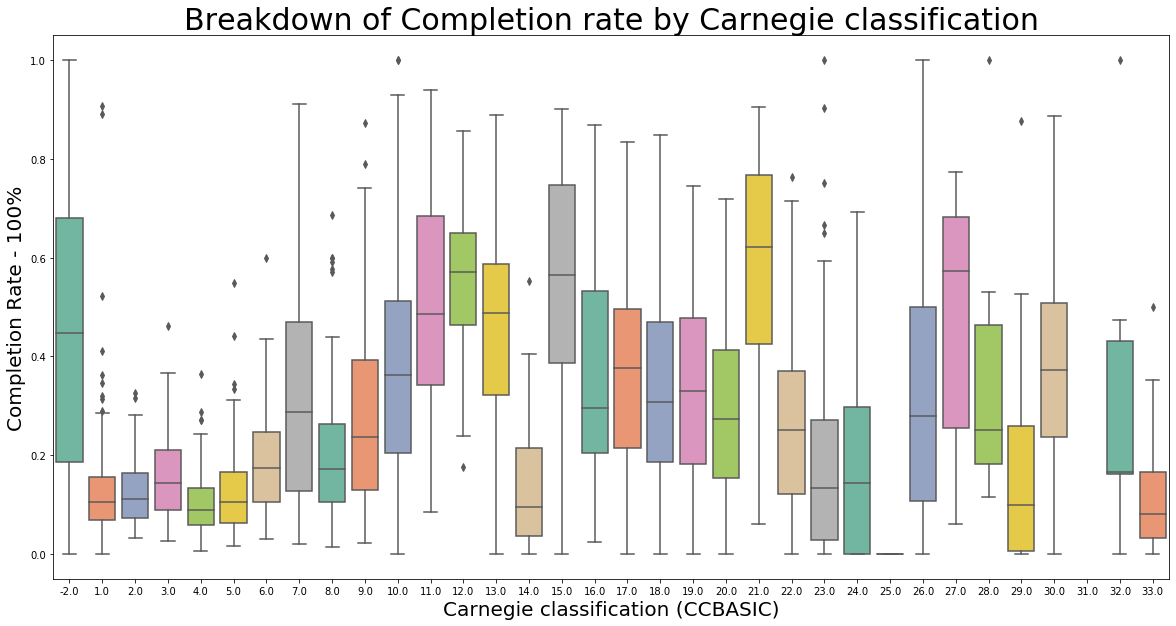

In [ ]:
a1_3b_100_pd = pd.DataFrame(a1_3b_100)
a1_4c_100_col  = a1_3b_100_pd.assign(CCBASIC = data['CCBASIC'])
plt.figure(figsize=(20,10))
ay100 = sns.boxplot(x="CCBASIC", y="C100_4_POOLED", data=a1_4c_100_col,palette="Set2")
ay100.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay100.set_ylabel('Completion Rate - 100%', fontsize=20)
ay100.set_xlabel('Carnegie classification (CCBASIC)', fontsize=20)

There are couple of classification in carnegie classification. Category 21 has the highest completion rate while category 14 has the lowest. Category -2 has the highest range of completion rate

CCBASIC - 100%

In [ ]:
a1_4c_100 = a1_4c_100_col .groupby('CCBASIC')['C100_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_100.head()

,25%,50%,75%,count,mean,std,min,max
CCBASIC,,,,,,,,
-2.0,0.186175,0.44715,0.680825,2160.0,0.441092,0.288406,0.0000,1.0000
1.0,0.068000,0.10500,0.155500,121.0,0.136902,0.133593,0.0000,0.9062
2.0,0.072900,0.11105,0.164250,118.0,0.123927,0.062375,0.0330,0.3260
3.0,0.088800,0.14360,0.210800,81.0,0.155107,0.092209,0.0273,0.4618
4.0,0.059100,0.09010,0.133950,123.0,0.102017,0.061609,0.0065,0.3642


CCBASIC - 150%

Text(0.5, 0, 'Carnegie classification (CCBASIC)')

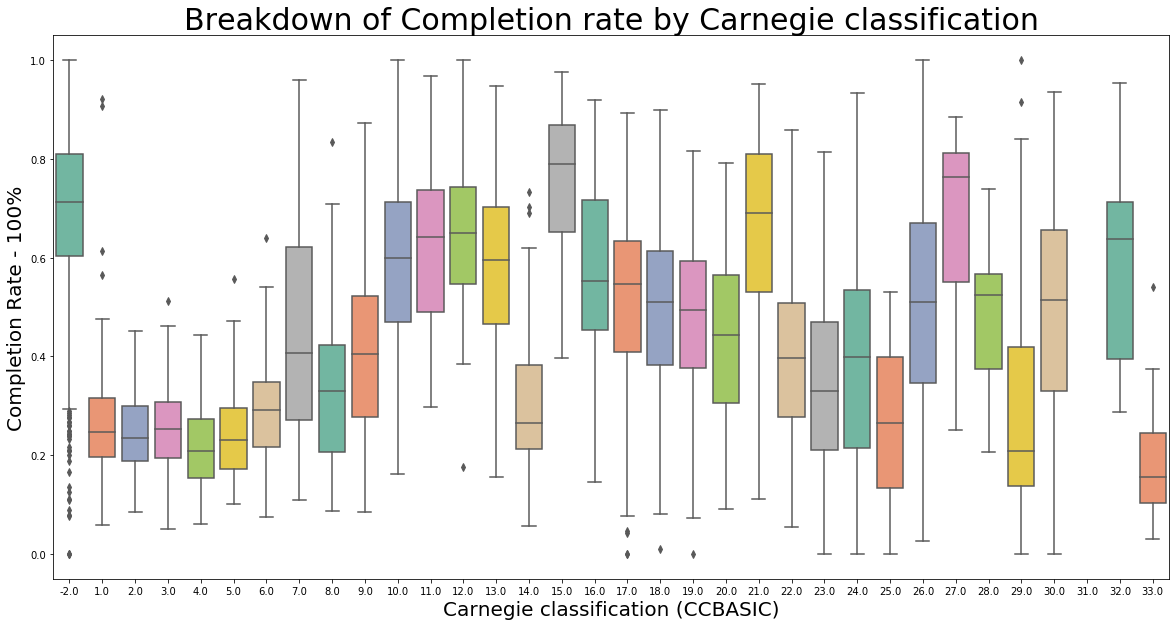

In [ ]:
a1_3b_150_pd = pd.DataFrame(a1_3b_150)
a1_4c_150_col  = a1_3b_150_pd.assign(CCBASIC = data['CCBASIC'])
plt.figure(figsize=(20, 10))
ay150 = sns.boxplot(x="CCBASIC", y="C150_4_POOLED", data=a1_4c_150_col,palette="Set2")
ay150.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay150.set_ylabel('Completion Rate - 100%', fontsize=20)
ay150.set_xlabel('Carnegie classification (CCBASIC)', fontsize=20)

Category 15 has the highest completion rate while category 33 has the lowest. Category 7 has the highest range of completion rate while category -2 has a lot of outliers

CCBASIC - 150%

In [ ]:
a1_4c_150 = a1_4c_150_col .groupby('CCBASIC')['C150_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_150.head()

,25%,50%,75%,count,mean,std,min,max
CCBASIC,,,,,,,,
-2.0,0.602525,0.71325,0.810175,2166.0,0.698307,0.161505,0.0000,1.0000
1.0,0.195900,0.24650,0.315000,121.0,0.266202,0.127580,0.0579,0.9217
2.0,0.188975,0.23590,0.299175,118.0,0.243649,0.074745,0.0848,0.4520
3.0,0.194700,0.25370,0.308000,81.0,0.254622,0.090963,0.0517,0.5127
4.0,0.154000,0.20900,0.273350,123.0,0.218179,0.080466,0.0606,0.4440


CCBASIC - 200%

Text(0.5, 0, 'Carnegie classification (CCBASIC)')

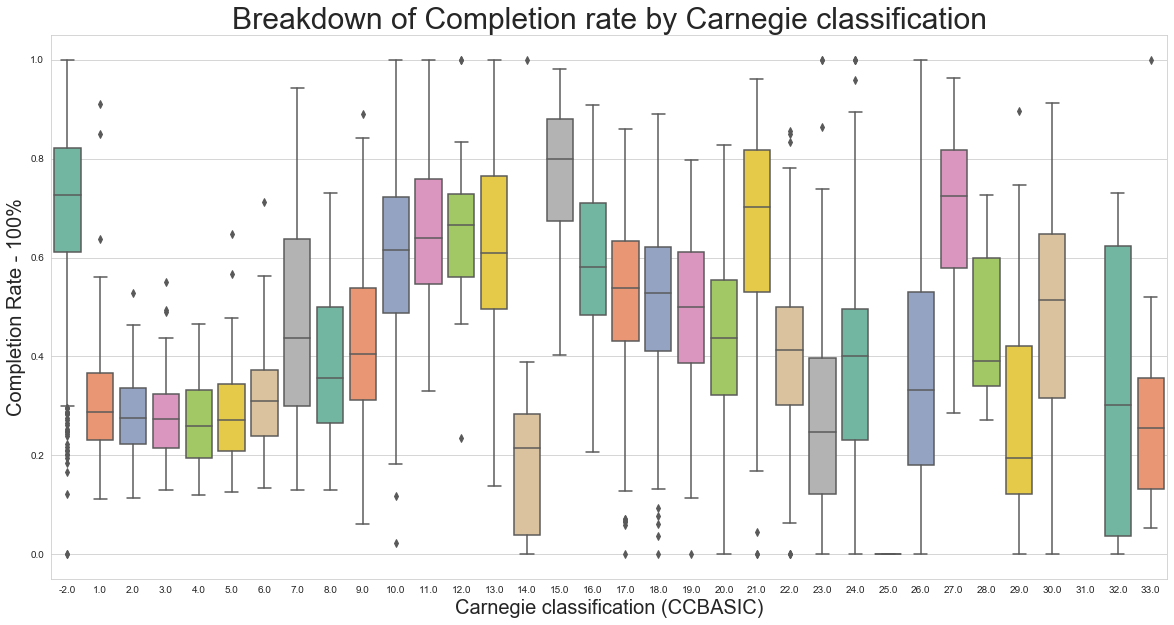

In [ ]:
a1_3b_200_pd = pd.DataFrame(a1_3b_200)
a1_4c_200_col  = a1_3b_200_pd.assign(CCBASIC = data['CCBASIC'])
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ay200 = sns.boxplot(x="CCBASIC", y="C200_4_POOLED", data=a1_4c_200_col,palette="Set2")
ay200.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay200.set_ylabel('Completion Rate - 100%', fontsize=20)
ay200.set_xlabel('Carnegie classification (CCBASIC)', fontsize=20)

Category 15 has the highest completion rate while category 14 has the lowest. Category 32 has the highest range of completion rate

CCBASIC - 200%

In [ ]:
a1_4c_200 = a1_4c_200_col .groupby('CCBASIC')['C200_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_200.head()

,25%,50%,75%,count,mean,std,min,max
CCBASIC,,,,,,,,
-2.0,0.61220,0.72680,0.821400,2097.0,0.709876,0.157927,0.0000,1.0000
1.0,0.23000,0.28750,0.366700,121.0,0.312563,0.123883,0.1124,0.9113
2.0,0.22200,0.27545,0.335875,118.0,0.282550,0.078207,0.1142,0.5281
3.0,0.21380,0.27360,0.323500,81.0,0.280721,0.090429,0.1293,0.5509
4.0,0.19515,0.25940,0.331050,123.0,0.263559,0.085046,0.1204,0.4658


# CCUGPROF

CCUGPROF - 100%

Text(0.5, 0, 'Carnegie classification (CCUGPROF)')

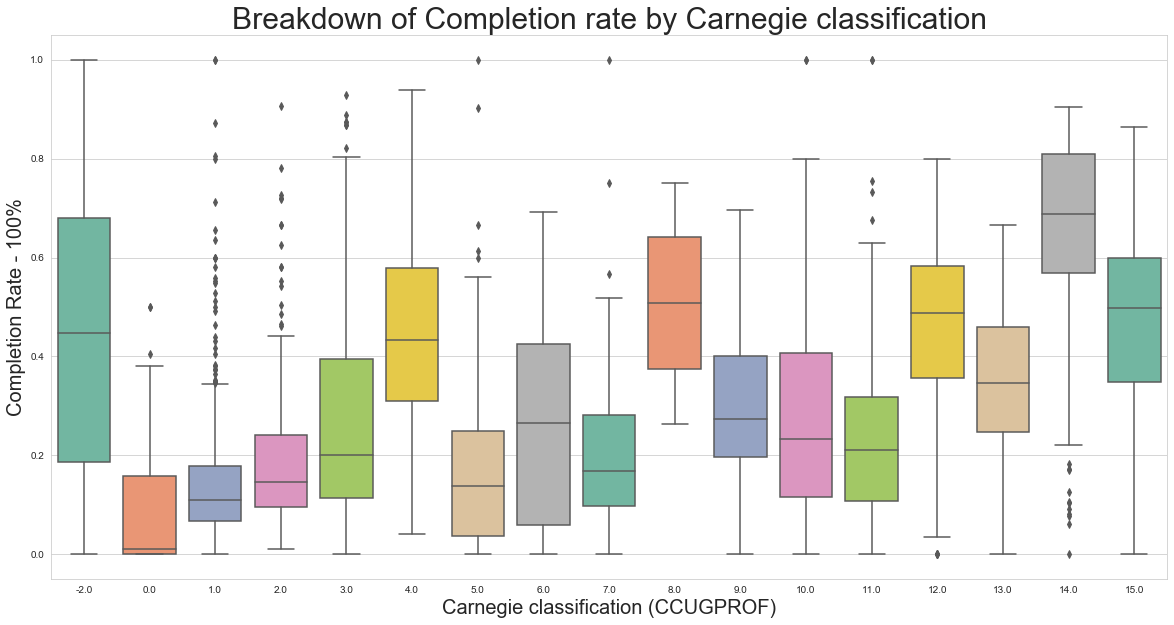

In [ ]:
a1_3b_100_pd = pd.DataFrame(a1_3b_100)
a1_4c_100_col  = a1_3b_100_pd.assign(CCUGPROF = data['CCUGPROF'])
plt.figure(figsize=(20,10))
ay100 = sns.boxplot(x="CCUGPROF", y="C100_4_POOLED", data=a1_4c_100_col,palette="Set2")
ay100.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay100.set_ylabel('Completion Rate - 100%', fontsize=20)
ay100.set_xlabel('Carnegie classification (CCUGPROF)', fontsize=20)

Category 14 has the highest completion rate while category 0 has the lowest. Category -2 has the highest range of completion rate

CCUGPROF - 100%

In [ ]:
a1_4c_100 = a1_4c_100_col .groupby('CCUGPROF')['C100_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_100.head()

,25%,50%,75%,count,mean,std,min,max
CCUGPROF,,,,,,,,
-2.0,0.186175,0.44715,0.680825,2160.0,0.441092,0.288406,0.0000,1.0000
0.0,0.000000,0.01115,0.158825,40.0,0.103820,0.155878,0.0000,0.5000
1.0,0.066700,0.11000,0.177875,538.0,0.147946,0.132323,0.0000,1.0000
2.0,0.094725,0.14590,0.240350,332.0,0.186419,0.139438,0.0107,0.9062
3.0,0.113350,0.20090,0.394375,188.0,0.284793,0.229674,0.0000,0.9286


CCUGPROF - 150%

Text(0.5, 0, 'Carnegie classification (CCUGPROF)')

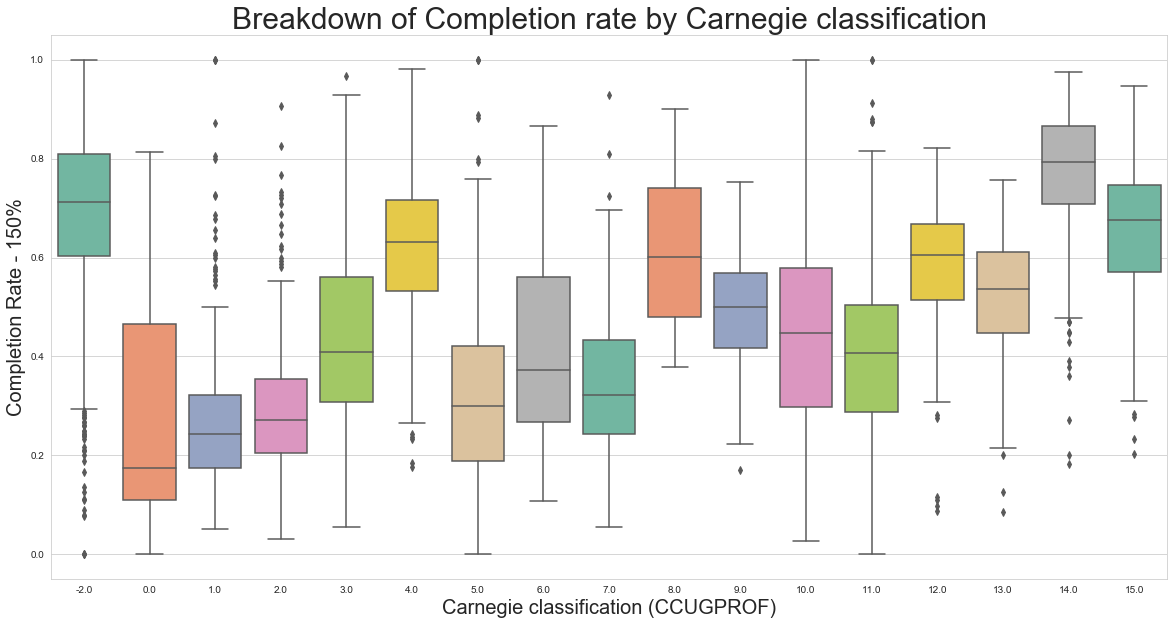

In [ ]:
a1_3b_150_pd = pd.DataFrame(a1_3b_150)
a1_4c_150_col  = a1_3b_150_pd.assign(CCUGPROF = data['CCUGPROF'])
plt.figure(figsize=(20, 10))
ay150 = sns.boxplot(x="CCUGPROF", y="C150_4_POOLED", data=a1_4c_150_col,palette="Set2")
ay150.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay150.set_ylabel('Completion Rate - 150%', fontsize=20)
ay150.set_xlabel('Carnegie classification (CCUGPROF)', fontsize=20)

Category 14 has the highest completion rate while category 0 has the lowest. Category 0 has the highest range of completion rate

CCUGPROF - 150%

In [ ]:
a1_4c_150 = a1_4c_150_col .groupby('CCUGPROF')['C150_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_150.head()

,25%,50%,75%,count,mean,std,min,max
CCUGPROF,,,,,,,,
-2.0,0.602525,0.71325,0.810175,2166.0,0.698307,0.161505,0.0000,1.0000
0.0,0.108600,0.17460,0.466000,41.0,0.271698,0.212827,0.0000,0.8139
1.0,0.174775,0.24205,0.320925,538.0,0.265159,0.131109,0.0517,1.0000
2.0,0.205000,0.27135,0.353325,332.0,0.294655,0.135440,0.0303,0.9062
3.0,0.307400,0.40815,0.560950,188.0,0.438982,0.192940,0.0541,0.9672


CCUGPROF - 200%

Text(0.5, 0, 'Carnegie classification (CCUGPROF)')

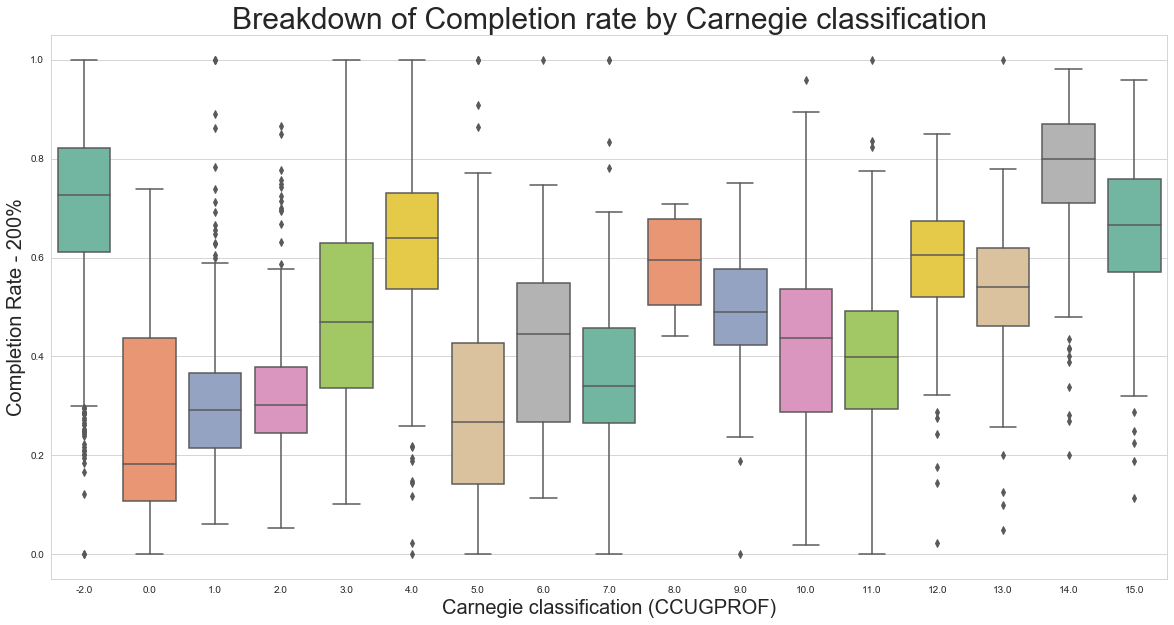

In [ ]:
a1_3b_200_pd = pd.DataFrame(a1_3b_200)
a1_4c_200_col  = a1_3b_200_pd.assign(CCUGPROF = data['CCUGPROF'])
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ay200 = sns.boxplot(x="CCUGPROF", y="C200_4_POOLED", data=a1_4c_200_col,palette="Set2")
ay200.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay200.set_ylabel('Completion Rate - 200%', fontsize=20)
ay200.set_xlabel('Carnegie classification (CCUGPROF)', fontsize=20)

Category 14 has the highest completion rate while category 0 has the lowest. Category 0 has the highest range of completion rate

CCUGPROF - 200%

In [ ]:
a1_4c_200 = a1_4c_200_col .groupby('CCUGPROF')['C200_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_200.head()

,25%,50%,75%,count,mean,std,min,max
CCUGPROF,,,,,,,,
-2.0,0.612200,0.72680,0.821400,2097.0,0.709876,0.157927,0.0000,1.0000
0.0,0.108375,0.18155,0.436875,40.0,0.270503,0.211512,0.0000,0.7392
1.0,0.213800,0.29100,0.366800,538.0,0.304422,0.129150,0.0618,1.0000
2.0,0.244050,0.30180,0.378100,331.0,0.325165,0.131411,0.0526,0.8667
3.0,0.335900,0.47060,0.628850,179.0,0.483637,0.194241,0.1017,1.0000


## CCSIZSET

CCSIZSET - 100%

Text(0.5, 0, 'Carnegie classification (CCSIZSET)')

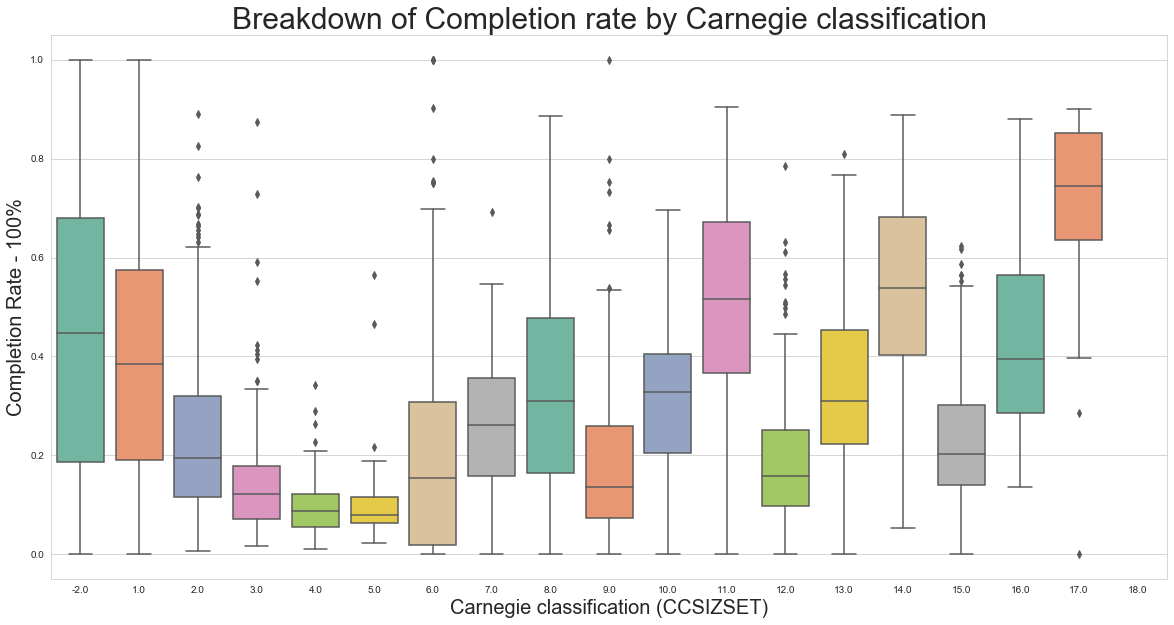

In [ ]:
a1_3b_100_pd = pd.DataFrame(a1_3b_100)
a1_4c_100_col  = a1_3b_100_pd.assign(CCSIZSET = data['CCSIZSET'])
plt.figure(figsize=(20,10))
ay100 = sns.boxplot(x="CCSIZSET", y="C100_4_POOLED", data=a1_4c_100_col,palette="Set2")
ay100.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay100.set_ylabel('Completion Rate - 100%', fontsize=20)
ay100.set_xlabel('Carnegie classification (CCSIZSET)', fontsize=20)

Category 17 has the highest completion rate while category 4 has the lowest. Category -2 has the highest range of completion rate

CCSIZSET - 100%

In [ ]:
a1_4c_100 = a1_4c_100_col .groupby('CCSIZSET')['C100_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_100.head()

,25%,50%,75%,count,mean,std,min,max
CCSIZSET,,,,,,,,
-2.0,0.186175,0.44715,0.680825,2160.0,0.441092,0.288406,0.0000,1.0000
1.0,0.191150,0.38460,0.574500,483.0,0.398456,0.238224,0.0000,1.0000
2.0,0.116375,0.19450,0.320775,436.0,0.237835,0.159584,0.0065,0.8896
3.0,0.072000,0.12110,0.177700,301.0,0.141700,0.101509,0.0160,0.8738
4.0,0.054400,0.08765,0.120725,144.0,0.094683,0.054040,0.0107,0.3428


CCSIZSET - 150%

Text(0.5, 0, 'Carnegie classification (CCSIZSET)')

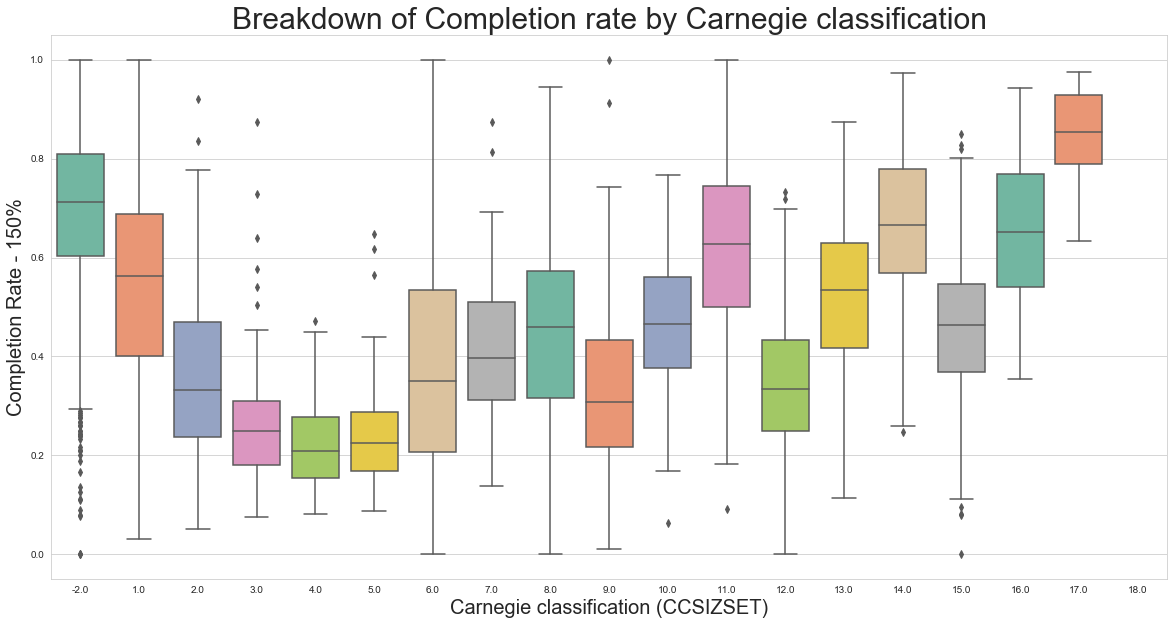

In [ ]:
a1_3b_150_pd = pd.DataFrame(a1_3b_150)
a1_4c_150_col  = a1_3b_150_pd.assign(CCSIZSET = data['CCSIZSET'])
plt.figure(figsize=(20, 10))
ay150 = sns.boxplot(x="CCSIZSET", y="C150_4_POOLED", data=a1_4c_150_col,palette="Set2")
ay150.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay150.set_ylabel('Completion Rate - 150%', fontsize=20)
ay150.set_xlabel('Carnegie classification (CCSIZSET)', fontsize=20)

Category 17 has the highest completion rate while category 4 has the lowest. Category 6 has the highest range of completion rate

CCSIZSET - 150%

In [ ]:
a1_4c_150 = a1_4c_150_col .groupby('CCSIZSET')['C150_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_150.head()

,25%,50%,75%,count,mean,std,min,max
CCSIZSET,,,,,,,,
-2.0,0.602525,0.71325,0.810175,2166.0,0.698307,0.161505,0.0000,1.0000
1.0,0.400000,0.56360,0.687800,485.0,0.543286,0.202661,0.0303,1.0000
2.0,0.236775,0.33150,0.469525,436.0,0.374839,0.179594,0.0517,0.9217
3.0,0.180500,0.24930,0.309300,301.0,0.256669,0.101149,0.0742,0.8738
4.0,0.154175,0.20870,0.276475,144.0,0.220092,0.083889,0.0807,0.4715


CCSIZSET - 200%

Text(0.5, 0, 'Carnegie classification (CCSIZSET)')

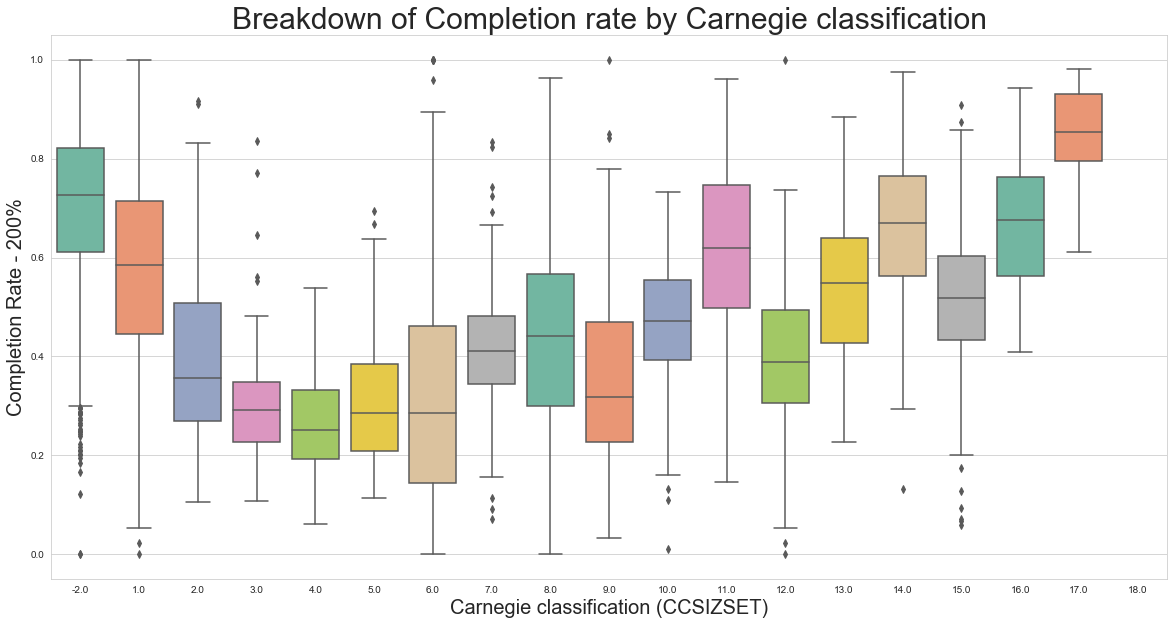

In [ ]:
a1_3b_200_pd = pd.DataFrame(a1_3b_200)
a1_4c_200_col  = a1_3b_200_pd.assign(CCSIZSET = data['CCSIZSET'])
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ay200 = sns.boxplot(x="CCSIZSET", y="C200_4_POOLED", data=a1_4c_200_col,palette="Set2")
ay200.set_title('Breakdown of Completion rate by Carnegie classification', fontsize=30)
ay200.set_ylabel('Completion Rate - 200%', fontsize=20)
ay200.set_xlabel('Carnegie classification (CCSIZSET)', fontsize=20)

Category 17 has the highest completion rate while category 6 has the lowest. Category 6 has the highest range of completion rate

CCSIZSET - 200%

In [ ]:
a1_4c_200 = a1_4c_200_col .groupby('CCSIZSET')['C200_4_POOLED'].agg('describe')[['25%', '50%', '75%', 'count', 'mean','std','min','max']]
a1_4c_200.head()

,25%,50%,75%,count,mean,std,min,max
CCSIZSET,,,,,,,,
-2.0,0.61220,0.7268,0.821400,2097.0,0.709876,0.157927,0.0000,1.0000
1.0,0.44440,0.5849,0.714300,469.0,0.562307,0.201630,0.0000,1.0000
2.0,0.26965,0.3565,0.508100,434.0,0.398105,0.175194,0.1064,0.9167
3.0,0.22680,0.2915,0.348600,301.0,0.294975,0.096250,0.1067,0.8363
4.0,0.19185,0.2518,0.332475,144.0,0.266201,0.095597,0.0618,0.5386


# 5. Relationship between numeric properties and completion rates 

# # 5.a. Admission rate

Admission rate vs Completion rate (100)

-0.25735359547851205

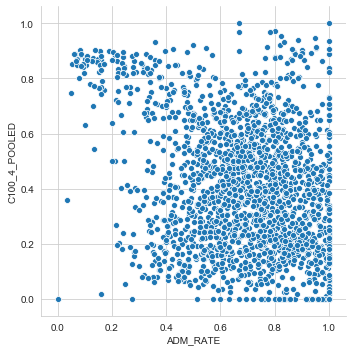

In [ ]:
a1_5a_100_pd = pd.DataFrame(a1_3b_100)
a1_5a_100_col_1  = a1_5a_100_pd.assign(ADM_RATE = data['ADM_RATE'])
a1_5a_100_col_1_plot = sns.relplot(x="ADM_RATE", y="C100_4_POOLED",  data=a1_5a_100_col_1)

#removing null value 
a1_5a_100_col_1 = a1_5a_100_col_1[pd.notnull(a1_5a_100_col_1['C100_4_POOLED'])]
a1_5a_100_col_1 = a1_5a_100_col_1 [pd.notnull(a1_5a_100_col_1['ADM_RATE'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5a_100_col_1['C100_4_POOLED'], a1_5a_100_col_1['ADM_RATE'])
correlation

They  have a negative correlation

Admission rate all vs Completion rate (100)

-0.24941981876675942

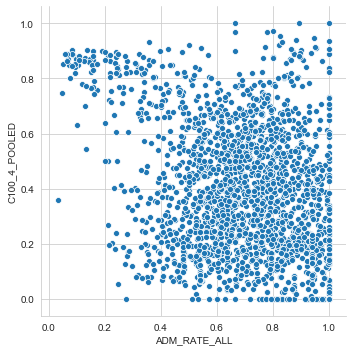

In [ ]:
a1_5a_100_pd = pd.DataFrame(a1_3b_100)
a1_5a_100_col_2  = a1_5a_100_pd.assign(ADM_RATE_ALL = data['ADM_RATE_ALL'])
a1_5a_100_col_2_plot = sns.relplot(x="ADM_RATE_ALL", y="C100_4_POOLED",  data=a1_5a_100_col_2)

#removing null value 
a1_5a_100_col_2 = a1_5a_100_col_2[pd.notnull(a1_5a_100_col_2['C100_4_POOLED'])]
a1_5a_100_col_2 = a1_5a_100_col_2 [pd.notnull(a1_5a_100_col_2['ADM_RATE_ALL'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5a_100_col_2['C100_4_POOLED'], a1_5a_100_col_2['ADM_RATE_ALL'])
correlation

They have a negative correlation

Admission rate vs Completion rate (150)

-0.2801621257046856

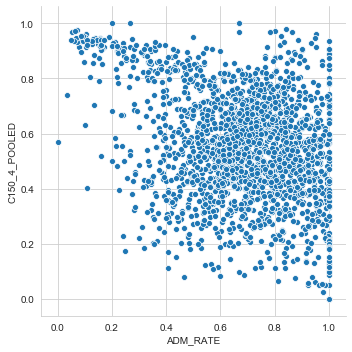

In [ ]:
a1_5a_150_pd = pd.DataFrame(a1_3b_150)
a1_5a_150_col_1  = a1_5a_150_pd.assign(ADM_RATE = data['ADM_RATE'])
a1_5a_150_col_1_plot = sns.relplot(x="ADM_RATE", y="C150_4_POOLED",  data=a1_5a_150_col_1)

#removing null value 
a1_5a_150_col_1 = a1_5a_150_col_1[pd.notnull(a1_5a_150_col_1['C150_4_POOLED'])]
a1_5a_150_col_1 = a1_5a_150_col_1 [pd.notnull(a1_5a_150_col_1['ADM_RATE'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5a_150_col_1['C150_4_POOLED'], a1_5a_150_col_1['ADM_RATE'])
correlation

They have a negative correlation

Admission rate all vs Completion rate (150)

-0.2748323399643578

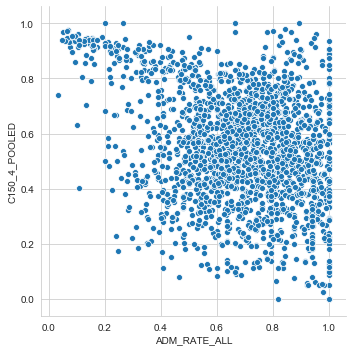

In [ ]:
a1_5a_150_pd = pd.DataFrame(a1_3b_150)
a1_5a_150_col_2  = a1_5a_150_pd.assign(ADM_RATE_ALL = data['ADM_RATE_ALL'])
a1_5a_150_col_2_plot = sns.relplot(x="ADM_RATE_ALL", y="C150_4_POOLED",  data=a1_5a_150_col_2)

#removing null value 
a1_5a_150_col_2 = a1_5a_150_col_2[pd.notnull(a1_5a_150_col_2['C150_4_POOLED'])]
a1_5a_150_col_2 = a1_5a_150_col_2 [pd.notnull(a1_5a_150_col_2['ADM_RATE_ALL'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5a_150_col_2['C150_4_POOLED'], a1_5a_150_col_2['ADM_RATE_ALL'])
correlation

They have a negative correlation

Admission rate vs Completion rate (200)

-0.26025940153628296

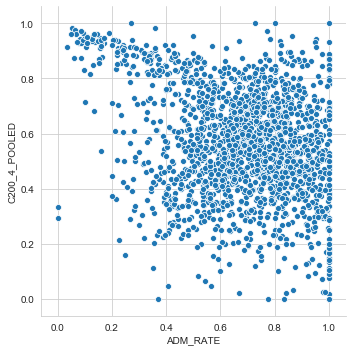

In [ ]:
a1_5a_200_pd = pd.DataFrame(a1_3b_200)
a1_5a_200_col_1  = a1_5a_200_pd.assign(ADM_RATE = data['ADM_RATE'])
a1_5a_200_col_1_plot = sns.relplot(x="ADM_RATE", y="C200_4_POOLED",  data=a1_5a_200_col_1)

#removing null value 
a1_5a_200_col_1 = a1_5a_200_col_1[pd.notnull(a1_5a_200_col_1['C200_4_POOLED'])]
a1_5a_200_col_1 = a1_5a_200_col_1 [pd.notnull(a1_5a_200_col_1['ADM_RATE'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5a_200_col_1['C200_4_POOLED'], a1_5a_200_col_1['ADM_RATE'])
correlation

They have a negative correlation

Admission rate all vs Completion rate (200)

-0.25828169819810837

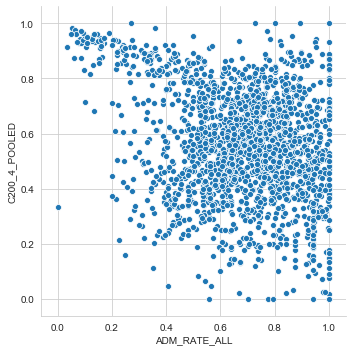

In [ ]:
a1_5a_200_pd = pd.DataFrame(a1_3b_200)
a1_5a_200_col_2  = a1_5a_200_pd.assign(ADM_RATE_ALL = data['ADM_RATE_ALL'])
a1_5a_200_col_2_plot = sns.relplot(x="ADM_RATE_ALL", y="C200_4_POOLED",  data=a1_5a_200_col_2)

#removing null value 
a1_5a_200_col_2 = a1_5a_200_col_2[pd.notnull(a1_5a_200_col_2['C200_4_POOLED'])]
a1_5a_200_col_2 = a1_5a_200_col_2 [pd.notnull(a1_5a_200_col_2['ADM_RATE_ALL'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5a_200_col_2['C200_4_POOLED'], a1_5a_200_col_2['ADM_RATE_ALL'])
correlation

They have a negative correlation

## 5b Size

Size vs Completion rate (100)

-0.11744320561896254

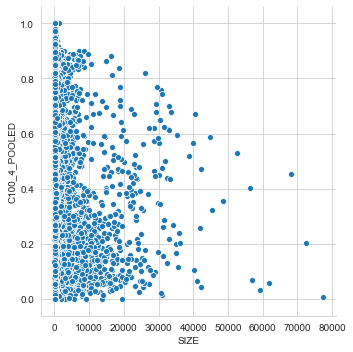

In [ ]:
a1_5b_100_pd = pd.DataFrame(a1_3b_100)
a1_5b_100_col  = a1_5b_100_pd.assign(SIZE = data['UGDS'])
a1_5b_100_col_plot = sns.relplot(x="SIZE", y="C100_4_POOLED",  data=a1_5b_100_col)

#removing null value 
a1_5b_100_col = a1_5b_100_col[pd.notnull(a1_5b_100_col['C100_4_POOLED'])]
a1_5b_100_col = a1_5b_100_col [pd.notnull(a1_5b_100_col['SIZE'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5b_100_col['C100_4_POOLED'], a1_5b_100_col['SIZE'])
correlation

They have a negative correlation

Size vs Completion rate (150)

-0.16436210978669277

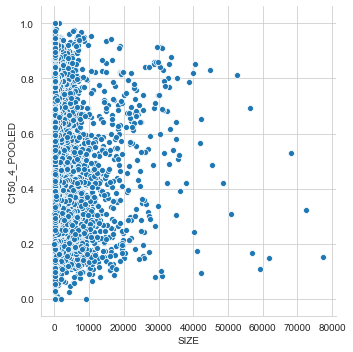

In [ ]:
a1_5b_150_pd = pd.DataFrame(a1_3b_150)
a1_5b_150_col  = a1_5b_150_pd.assign(SIZE = data['UGDS'])
a1_5b_150_col_plot = sns.relplot(x="SIZE", y="C150_4_POOLED",  data=a1_5b_150_col)

#removing null value 
a1_5b_150_col = a1_5b_150_col[pd.notnull(a1_5b_150_col['C150_4_POOLED'])]
a1_5b_150_col = a1_5b_150_col [pd.notnull(a1_5b_150_col['SIZE'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5b_150_col['C150_4_POOLED'], a1_5b_150_col['SIZE'])
correlation

They have a negative correlation

Size vs Completion rate (200)

-0.1304012154030157

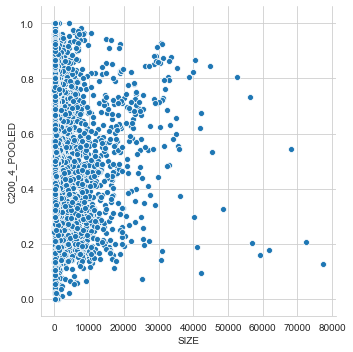

In [ ]:
a1_5b_200_pd = pd.DataFrame(a1_3b_200)
a1_5b_200_col  = a1_5b_200_pd.assign(SIZE = data['UGDS'])
a1_5b_200_col_plot = sns.relplot(x="SIZE", y="C200_4_POOLED",  data=a1_5b_200_col)

#removing null value 
a1_5b_200_col = a1_5b_200_col[pd.notnull(a1_5b_200_col['C200_4_POOLED'])]
a1_5b_200_col = a1_5b_200_col [pd.notnull(a1_5b_200_col['SIZE'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5b_200_col['C200_4_POOLED'], a1_5b_200_col['SIZE'])
correlation

They have a negative correlation

# 5.c. Tuition & Fees

In-state Tuition & Fees vs Completion rate (100)

0.6322105919698318

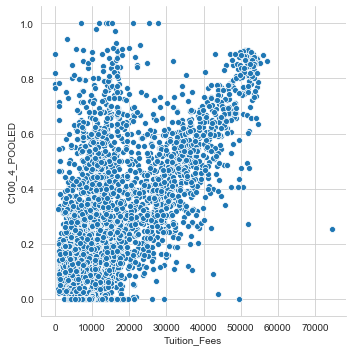

In [ ]:
a1_5c_100_pd = pd.DataFrame(a1_3b_100)
a1_5c_100_col  = a1_5c_100_pd.assign(Tuition_Fees = data['TUITIONFEE_IN'])
a1_5c_100_col_plot = sns.relplot(x="Tuition_Fees", y="C100_4_POOLED",  data=a1_5c_100_col)

#removing null value 
a1_5c_100_col = a1_5c_100_col[pd.notnull(a1_5c_100_col['C100_4_POOLED'])]
a1_5c_100_col = a1_5c_100_col [pd.notnull(a1_5c_100_col['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_100_col['C100_4_POOLED'], a1_5c_100_col['Tuition_Fees'])
correlation

They have a strong positive correlation

In-state Tuition & Fees vs Completion rate (150)

0.5906807885960926

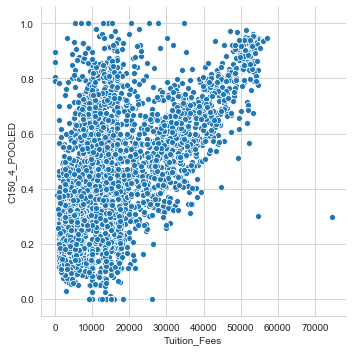

In [ ]:
a1_5c_150_pd = pd.DataFrame(a1_3b_150)
a1_5c_150_col  = a1_5c_150_pd.assign(Tuition_Fees = data['TUITIONFEE_IN'])
a1_5c_150_col_plot = sns.relplot(x="Tuition_Fees", y="C150_4_POOLED",  data=a1_5c_150_col)

#removing null value 
a1_5c_150_col = a1_5c_150_col[pd.notnull(a1_5c_150_col['C150_4_POOLED'])]
a1_5c_150_col = a1_5c_150_col [pd.notnull(a1_5c_150_col['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_150_col['C150_4_POOLED'], a1_5c_150_col['Tuition_Fees'])
correlation

They have a strong positive correlation

In-state Tuition & Fees vs Completion rate (200)

0.5550067923758801

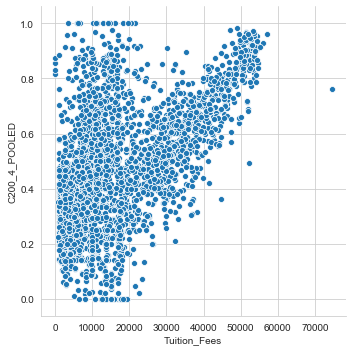

In [ ]:
a1_5c_200_pd = pd.DataFrame(a1_3b_200)
a1_5c_200_col  = a1_5c_200_pd.assign(Tuition_Fees = data['TUITIONFEE_IN'])
a1_5c_200_col_plot = sns.relplot(x="Tuition_Fees", y="C200_4_POOLED",  data=a1_5c_200_col )

#removing null value 
a1_5c_200_col = a1_5c_200_col [pd.notnull(a1_5c_200_col ['C200_4_POOLED'])]
a1_5c_200_col  = a1_5c_200_col  [pd.notnull(a1_5c_200_col ['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_200_col ['C200_4_POOLED'], a1_5c_200_col ['Tuition_Fees'])
correlation

They have a strong positive correlation

Out of state Tuition & Fees vs Completion rate (100)

0.6229501470011898

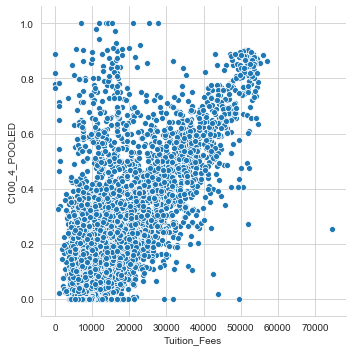

In [ ]:
a1_5c_100_pd = pd.DataFrame(a1_3b_100)
a1_5c_100_col  = a1_5c_100_pd.assign(Tuition_Fees = data['TUITIONFEE_OUT'])
a1_5c_100_col_plot = sns.relplot(x="Tuition_Fees", y="C100_4_POOLED",  data=a1_5c_100_col)

#removing null value 
a1_5c_100_col = a1_5c_100_col[pd.notnull(a1_5c_100_col['C100_4_POOLED'])]
a1_5c_100_col = a1_5c_100_col [pd.notnull(a1_5c_100_col['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_100_col['C100_4_POOLED'], a1_5c_100_col['Tuition_Fees'])
correlation

They have a strong positive correlation

Out of state Tuition & Fees vs Completion rate (150)

0.6170162882213971

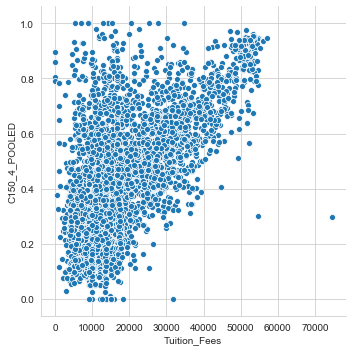

In [ ]:
a1_5c_150_pd = pd.DataFrame(a1_3b_150)
a1_5c_150_col  = a1_5c_150_pd.assign(Tuition_Fees = data['TUITIONFEE_OUT'])
a1_5c_150_col_plot = sns.relplot(x="Tuition_Fees", y="C150_4_POOLED",  data=a1_5c_150_col)

#removing null value 
a1_5c_150_col = a1_5c_150_col[pd.notnull(a1_5c_150_col['C150_4_POOLED'])]
a1_5c_150_col = a1_5c_150_col [pd.notnull(a1_5c_150_col['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_150_col['C150_4_POOLED'], a1_5c_150_col['Tuition_Fees'])
correlation

They have a strong positive correlation

Out of state Tuition & Fees vs Completion rate (200)

0.5985165057163231

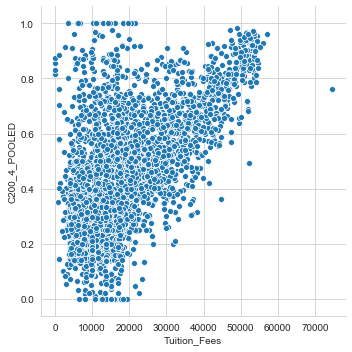

In [ ]:
a1_5c_200_pd = pd.DataFrame(a1_3b_200)
a1_5c_200_col  = a1_5c_200_pd.assign(Tuition_Fees = data['TUITIONFEE_OUT'])
a1_5c_200_col_plot = sns.relplot(x="Tuition_Fees", y="C200_4_POOLED",  data=a1_5c_200_col )

#removing null value 
a1_5c_200_col = a1_5c_200_col [pd.notnull(a1_5c_200_col ['C200_4_POOLED'])]
a1_5c_200_col  = a1_5c_200_col  [pd.notnull(a1_5c_200_col ['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_200_col ['C200_4_POOLED'], a1_5c_200_col ['Tuition_Fees'])
correlation

They have a strong positive correlation

Program-year institutions Tuition & Fees vs Completion rate (100)

-0.13600544794873753

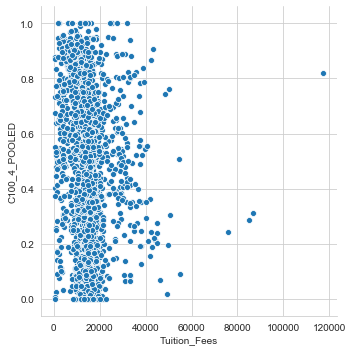

In [ ]:
a1_5c_100_pd = pd.DataFrame(a1_3b_100)
a1_5c_100_col  = a1_5c_100_pd.assign(Tuition_Fees = data['TUITIONFEE_PROG'])
a1_5c_100_col_plot = sns.relplot(x="Tuition_Fees", y="C100_4_POOLED",  data=a1_5c_100_col)

#removing null value 
a1_5c_100_col = a1_5c_100_col[pd.notnull(a1_5c_100_col['C100_4_POOLED'])]
a1_5c_100_col = a1_5c_100_col [pd.notnull(a1_5c_100_col['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_100_col['C100_4_POOLED'], a1_5c_100_col['Tuition_Fees'])
correlation

They have a negative correlation

Program-year institutions Tuition & Fees vs Completion rate (150)

-0.12850147443528306

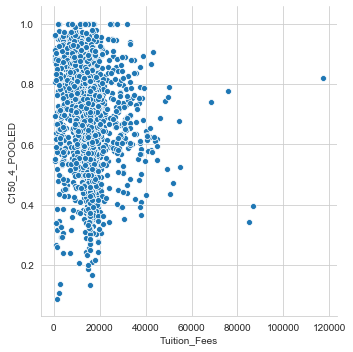

In [ ]:
a1_5c_150_pd = pd.DataFrame(a1_3b_150)
a1_5c_150_col  = a1_5c_150_pd.assign(Tuition_Fees = data['TUITIONFEE_PROG'])
a1_5c_150_col_plot = sns.relplot(x="Tuition_Fees", y="C150_4_POOLED",  data=a1_5c_150_col)

#removing null value 
a1_5c_150_col = a1_5c_150_col[pd.notnull(a1_5c_150_col['C150_4_POOLED'])]
a1_5c_150_col = a1_5c_150_col [pd.notnull(a1_5c_150_col['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_150_col['C150_4_POOLED'], a1_5c_150_col['Tuition_Fees'])
correlation

They have a negative correlation

Program-year institutions Tuition & Fees vs Completion rate (200)

-0.12917271468169356

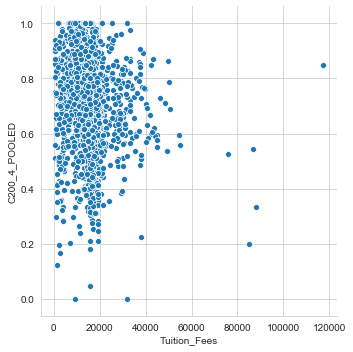

In [ ]:
a1_5c_200_pd = pd.DataFrame(a1_3b_200)
a1_5c_200_col  = a1_5c_200_pd.assign(Tuition_Fees = data['TUITIONFEE_PROG'])
a1_5c_200_col_plot = sns.relplot(x="Tuition_Fees", y="C200_4_POOLED",  data=a1_5c_200_col )

#removing null value 
a1_5c_200_col = a1_5c_200_col [pd.notnull(a1_5c_200_col ['C200_4_POOLED'])]
a1_5c_200_col  = a1_5c_200_col  [pd.notnull(a1_5c_200_col ['Tuition_Fees'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5c_200_col ['C200_4_POOLED'], a1_5c_200_col ['Tuition_Fees'])
correlation

They have a negative correlation

## 5d Cost

Cost (COSTT4_A) vs Completion rate (100)

0.6389294555248902

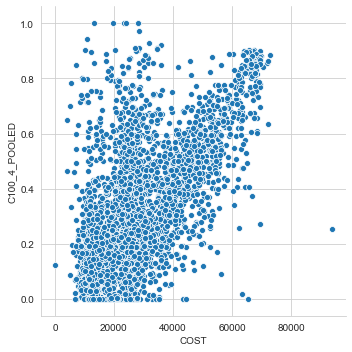

In [ ]:
a1_5d_100_pd = pd.DataFrame(a1_3b_100)
a1_5d_100_col  = a1_5d_100_pd.assign(COST = data['COSTT4_A'])
a1_5d_100_col_plot = sns.relplot(x="COST", y="C100_4_POOLED",  data=a1_5d_100_col)

#removing null value 
a1_5d_100_col = a1_5d_100_col[pd.notnull(a1_5d_100_col['C100_4_POOLED'])]
a1_5d_100_col= a1_5d_100_col [pd.notnull(a1_5d_100_col['COST'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5d_100_col['C100_4_POOLED'], a1_5d_100_col['COST'])
correlation

They have a strong positive correlation

Cost(COSTT4_P)  vs Completion rate (100)

-0.0485646446735019

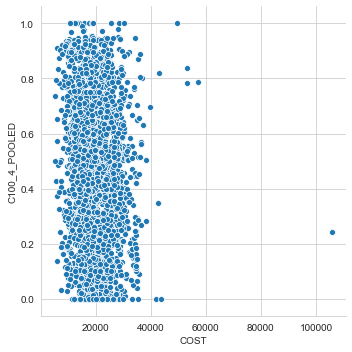

In [ ]:
a1_5d_100_pd = pd.DataFrame(a1_3b_100)
a1_5d_100_col  = a1_5d_100_pd.assign(COST = data['COSTT4_P'])
a1_5d_100_col_plot = sns.relplot(x="COST", y="C100_4_POOLED",  data=a1_5d_100_col)

#removing null value 
a1_5d_100_col = a1_5d_100_col[pd.notnull(a1_5d_100_col['C100_4_POOLED'])]
a1_5d_100_col = a1_5d_100_col [pd.notnull(a1_5d_100_col['COST'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5d_100_col['C100_4_POOLED'], a1_5d_100_col['COST'])
correlation

They have a negative correlation

Cost (COSTT4_A)  vs Completion rate (150)

0.6156854603956649

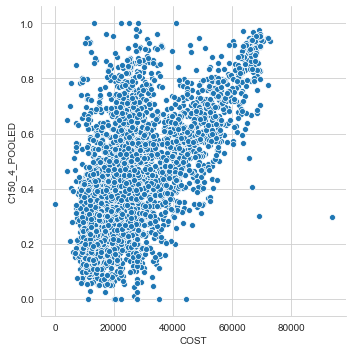

In [ ]:
a1_5d_150_pd = pd.DataFrame(a1_3b_150)
a1_5d_150_col  = a1_5d_150_pd.assign(COST = data['COSTT4_A'])
a1_5d_150_col_plot = sns.relplot(x="COST", y="C150_4_POOLED",  data=a1_5d_150_col)

#removing null value 
a1_5d_150_col = a1_5d_150_col[pd.notnull(a1_5d_150_col['C150_4_POOLED'])]
a1_5d_150_col= a1_5d_150_col [pd.notnull(a1_5d_150_col['COST'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5d_150_col['C150_4_POOLED'], a1_5d_150_col['COST'])
correlation

They have a strong positive correlation

Cost (COSTT4_P)  vs Completion rate (150)

-0.06935501494108635

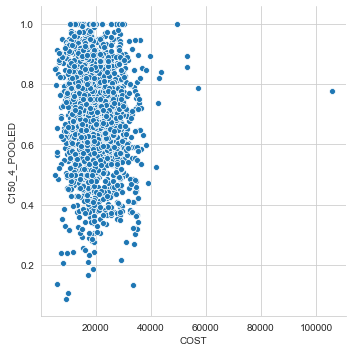

In [ ]:
a1_5d_150_pd = pd.DataFrame(a1_3b_150)
a1_5d_150_col  = a1_5d_150_pd.assign(COST = data['COSTT4_P'])
a1_5d_150_col_plot = sns.relplot(x="COST", y="C150_4_POOLED",  data=a1_5d_150_col)

#removing null value 
a1_5d_150_col = a1_5d_150_col[pd.notnull(a1_5d_150_col['C150_4_POOLED'])]
a1_5d_150_col = a1_5d_150_col [pd.notnull(a1_5d_150_col['COST'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5d_150_col['C150_4_POOLED'], a1_5d_150_col['COST'])
correlation

They have a negative correlation

Cost(COSTT4_A)  vs Completion rate (200)

0.5799214954833282

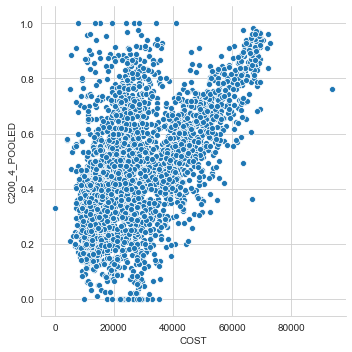

In [ ]:
a1_5d_200_pd = pd.DataFrame(a1_3b_200)
a1_5d_200_col  = a1_5d_200_pd.assign(COST = data['COSTT4_A'])
a1_5d_200_col_plot = sns.relplot(x="COST", y="C200_4_POOLED",  data=a1_5d_200_col)

#removing null value 
a1_5d_200_col = a1_5d_200_col[pd.notnull(a1_5d_200_col['C200_4_POOLED'])]
a1_5d_200_col = a1_5d_200_col [pd.notnull(a1_5d_200_col['COST'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5d_200_col['C200_4_POOLED'], a1_5d_200_col['COST'])
correlation

They have a strong positive correlation

Cost(COSTT4_P)  vs Completion rate (200)

-0.05776194103150154

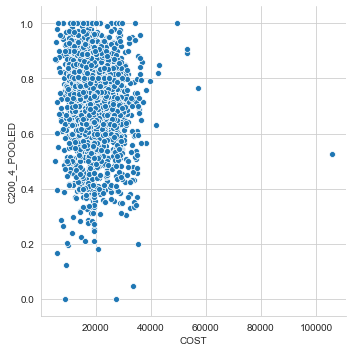

In [ ]:
a1_5d_200_pd = pd.DataFrame(a1_3b_200)
a1_5d_200_col  = a1_5d_200_pd.assign(COST = data['COSTT4_P'])
a1_5d_200_col_plot = sns.relplot(x="COST", y="C200_4_POOLED",  data=a1_5d_200_col)

#removing null value 
a1_5d_200_col = a1_5d_200_col[pd.notnull(a1_5d_200_col['C200_4_POOLED'])]
a1_5d_200_col = a1_5d_200_col [pd.notnull(a1_5d_200_col['COST'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5d_200_col['C200_4_POOLED'], a1_5d_200_col['COST'])
correlation

They have a negative correlation

# 5. e. Difference between tuition & fees and cost

For the differecnce between tuition fees and cost I have deducted the Instate tuition fees from the average annual cost of attendance because The average annual cost of attendance includes tuition and fees, books
and supplies, and living expenses for all full-time, first-time, degree-
/certificate-seeking undergraduates.

I have used the academic year institutions (COSTT4_A) - Instate tuition fee for analysis (TUITIONFEE_IN)

[Cost(COSTT4_P) -  Instate tuition fee for analysis (TUITIONFEE_IN)] vs Completion rate (100)

0.29227699002675345

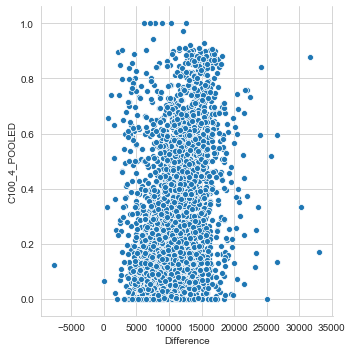

In [ ]:
a1_5e_100_pd = pd.DataFrame(a1_3b_100)
a1_5e_100_diff = data['COSTT4_A'] - data['TUITIONFEE_IN']
a1_5e_100_col  = a1_5e_100_pd.assign(Difference = a1_5e_100_diff)
a1_5e_100_col_plot = sns.relplot(x="Difference", y="C100_4_POOLED",  data=a1_5e_100_col)

#removing null value 
a1_5e_100_col = a1_5e_100_col[pd.notnull(a1_5e_100_col['C100_4_POOLED'])]
a1_5e_100_col= a1_5e_100_col [pd.notnull(a1_5e_100_col['Difference'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5e_100_col['C100_4_POOLED'], a1_5e_100_col['Difference'])
correlation


They have positive but not very high correlation

[Cost(COSTT4_P) - Instate tuition fee for analysis (TUITIONFEE_IN)] vs Completion rate (150)

0.3368556751605359

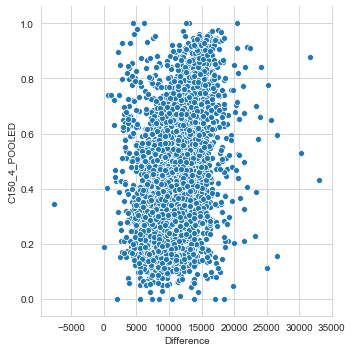

In [ ]:
a1_5e_150_pd = pd.DataFrame(a1_3b_150)
a1_5e_150_diff = data['COSTT4_A'] - data['TUITIONFEE_IN']
a1_5e_150_col  = a1_5e_150_pd.assign(Difference = a1_5e_150_diff)
a1_5e_150_col_plot = sns.relplot(x="Difference", y="C150_4_POOLED",  data=a1_5e_150_col)

#removing null value 
a1_5e_150_col = a1_5e_150_col[pd.notnull(a1_5e_150_col['C150_4_POOLED'])]
a1_5e_150_col= a1_5e_150_col [pd.notnull(a1_5e_150_col['Difference'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5e_150_col['C150_4_POOLED'], a1_5e_150_col['Difference'])
correlation

They have positive but not very high correlation

[Cost(COSTT4_P) - Instate tuition fee for analysis (TUITIONFEE_IN)] vs Completion rate (200)

0.32088597894256915

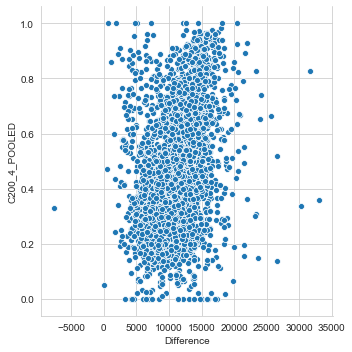

In [ ]:
a1_5e_200_pd = pd.DataFrame(a1_3b_200)
a1_5e_200_diff = data['COSTT4_A'] - data['TUITIONFEE_IN']
a1_5e_200_col  = a1_5e_200_pd.assign(Difference = a1_5e_200_diff)
a1_5e_200_col_plot = sns.relplot(x="Difference", y="C200_4_POOLED",  data=a1_5e_200_col)

#removing null value 
a1_5e_200_col = a1_5e_200_col[pd.notnull(a1_5e_200_col['C200_4_POOLED'])]
a1_5e_200_col= a1_5e_200_col [pd.notnull(a1_5e_200_col['Difference'])]
# # calculate correlation
correlation,p_value = stats.pearsonr(a1_5e_200_col['C200_4_POOLED'], a1_5e_200_col['Difference'])
correlation


They have positive but not very high correlation

# 6. Observations about completion rate

1. For the boxplots of completion rate with respect to Control/Ownership in most of the cases the first category had the lowest completion rate while the last one had most. 
2. For CCBASIC a general pattern was seen with respect to completion rate. In all time horizon (100/150/200) it had large amount of completion rate in the middle categories
3. For CCSIZSET it had the complete opposite pattern with respect to completion rate. The middle categories had lower values while it had higher values on the edges
4. For both kind of admission rate variable the completion rate had a negative correlation at all time horizon
5. For size also the completion rate had a negative correlation at all time horizon
6. Incase of Tuition and Fees The Instate and out of state had positive correlation with the completion rate at all time horizon whereas Program-year institutions Tuition & Fees  had negative correlation at all time horizon
7. Among the two types of cost,  academic year institutions (COSTT4_A) had positive correlation in all three time horizon but for the program-year institutions (COSTT4_P) it had negative correlation in all the time horizon